<a href="https://colab.research.google.com/github/kyleyuen/MNIST-Digit-Classifer/blob/main/MNIST_py.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8675 - loss: 0.4671 - val_accuracy: 0.9560 - val_loss: 0.1580
Epoch 2/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9597 - loss: 0.1375 - val_accuracy: 0.9664 - val_loss: 0.1188
Epoch 3/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9731 - loss: 0.0878 - val_accuracy: 0.9693 - val_loss: 0.1000
Epoch 4/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9814 - loss: 0.0626 - val_accuracy: 0.9713 - val_loss: 0.0923
Epoch 5/5
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9863 - loss: 0.0474 - val_accuracy: 0.9745 - val_loss: 0.0896
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9722 - loss: 0.0917
Test Accuracy: 0.9758


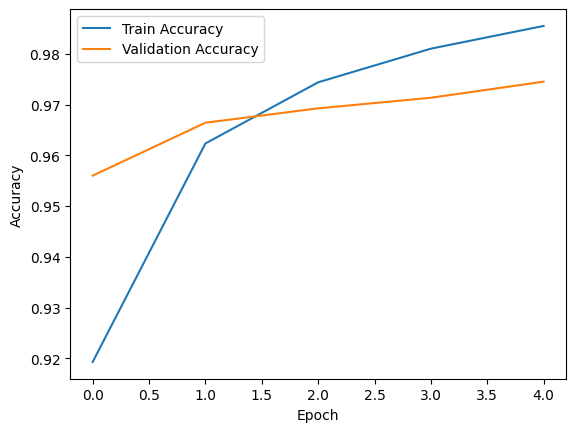

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
[4.7132225e-08 1.5969182e-08 8.2987108e-06 4.4107699e-05 3.5037005e-11
 1.0468450e-08 1.7946899e-11 9.9994379e-01 1.4949017e-06 2.1597134e-06]
Predicted digit: 7


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist #Ensure the MNIST dataset has been loaded

#splits loaded data into different criteria
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#scales the image values from 0 to 225 just to 0 and 1
#Higher accuracy for training neural networks
#By ensuring gradients maintain at 0 to 1 removes the possibility of "exploding gradients"
#This is where gradients become very large leading to unstable training
train_images = train_images / 255.0
test_images = test_images / 255.0

#Set up our sequential model through tensorflow
model = keras.Sequential([

    #Converst a 2D image into a 1D array of 28*28
    #Dense cannot be used with a 2D array and only can be fed through a 1D array
    keras.layers.Flatten(input_shape=(28,28)),

    #Higher neurons requires more computing power
    #Rectified Linear Unit: Introduces non linear learning where it learn through complex patterns
    #Faster than previous models such as sigmoid/tanh

    #Eventually the neural network will learn which non-linear combination matters
    #Given it is fed into a 1D array
    keras.layers.Dense(128, activation="relu"),

    #10 neurons: 0 - 9 therefore 10 digits

    #Softmax predics the probability of it being that certain neuron --> certain number
    #Predicts the probaboility of being that certain neuron or number
    #Do not just arbiturarily pick a number, uses probability
    keras.layers.Dense(10, activation="softmax")
])

#Before training, this reduces weight of the program or optimizes the training
model.compile(

    #widely used model
    #combines momentum and adaptive learning rate and do not need finetuning
    optimizer='adam',

    #Measure how wrong the model's predictions are
    #Compares predicted probability distribution (from Softmax) with the true label
    #High probability for the correct class → low loss
    #Low probability for correct class → high loss
    loss='sparse_categorical_crossentropy',

    #Metric to measure how accurate the model is
    #
    metrics=['accuracy']
)

#Records how well each iteration is doing and refining based on each epoch
history = model.fit(
    #Provide both images and answers for the model
    train_images, train_labels,

    #Number of complete passes over the training dataset
    #Each epoch helps the model gradually adjust weights to reduce loss
    #The more the better but the more time it takes: Deminishing value
    epochs = 5, # Corrected 'epoch' to 'epochs'

    #Calculate how many images the model goes through before updating the weights
    #Format: 32 images --> update weights --> 32 images again
    batch_size = 32,

    #Reserves 20% of training data to evaluate the model after each epoch.
    validation_split = 0.2
)

#Provides us accuracy test on unseen data and outputs the accuracy value
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test Accuracy: {test_acc:.4f}")

#Plot an accruacy graph
#To see how accuracy changed over epochs
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




